# General Instructions to students:

1. There are 5 types of cells in this notebook. The cell type will be indicated within the cell.
    1. Markdown cells with problem written in it. (DO NOT TOUCH THESE CELLS) (**Cell type: TextRead**)
    2. Python cells with setup code for further evaluations. (DO NOT TOUCH THESE CELLS) (**Cell type: CodeRead**)
    3. Python code cells with some template code or empty cell. (FILL CODE IN THESE CELLS BASED ON INSTRUCTIONS IN CURRENT AND PREVIOUS CELLS) (**Cell type: CodeWrite**)
    4. Markdown cells where a written reasoning or conclusion is expected. (WRITE SENTENCES IN THESE CELLS) (**Cell type: TextWrite**)
    5. Temporary code cells for convenience and TAs. (YOU MAY DO WHAT YOU WILL WITH THESE CELLS, TAs WILL REPLACE WHATEVER YOU WRITE HERE WITH OFFICIAL EVALUATION CODE) (**Cell type: Convenience**)
    
2. You are not allowed to insert new cells in the submitted notebook.

3. You are not allowed to import any extra packages.

4. The code is to be written in Python 3.6 syntax. Latest versions of other packages maybe assumed.

5. In CodeWrite Cells, the only outputs to be given are plots asked in the question. Nothing else to be output/print. 

6. If TextWrite cells ask you to give accuracy/error/other numbers you can print them on the code cells, but remove the print statements before submitting.

7. The convenience code can be used to check the expected syntax of the functions. At a minimum, your entire notebook must run with "run all" with the convenience cells as it is. Any runtime failures on the submitted notebook as it is will get zero marks.

8. All code must be written by yourself. Copying from other students/material on the web is strictly prohibited. Any violations will result in zero marks.

9. All datasets will be given as .npz files, and will contain data in 4 numpy arrays :"X_train, Y_train, X_test, Y_test". In that order. The meaning of the 4 arrays can be easily inferred from their names.

10. All plots must be labelled properly, all tables must have rows and columns named properly.

11. Before subbmission ensure that you submit with the outputs (do not clear the outputs), so that when evaluating we can run selectively.

12. Before submission ensure that the path for the folder containing the data is "../../Data/" 


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
import matplotlib as mpl
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# 1. Logistic Regression 

Write code for doing logistic regression below. Also write code for choosing best hyperparameters for each kernel type (use a part of training set as validation set). 

The range of hyperparameters is typically chosen on a log scale e.g. 1e-4, 1e-3, 1e-2... 1e3.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters. 

For each given hyperparameter setting (kernel and regularisation) you will have to do some exploring to find the right learning rate to use in gradient descent. The optimisation learning rate is not a model hyperparameter and hence can be chosen based on just the training set. i.e. choose the learning rate for which the training loss decreases the most.

For the synthetic classification datasets (dataset_A and dataset_B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.


In [ ]:
# CodeWrite 
#Write logistic regression code from scratch. Use gradient descent.
# Only write functions here

def sigmoid(u):
    if(u<=-100):
        return(0)
    elif(u>=100):
        return(1)
    else:
        return(1/(1+np.exp(-u)))
    
def kernel_compute(u, v, kernel, kernel_param):
    if(kernel=='linear'):
        val = np.dot(u,v)
    elif(kernel=='poly'):
        val = ((1+np.dot(u,v))**kernel_param)
    elif(kernel=='rbf'):
        val = np.exp(-1*kernel_param*np.dot(u-v,u-v))
    return(val)

def train_pred_logistic_regression(X, Y, kernel='linear', reg_param=0.,
                                   kernel_param=1., num_iter_gd=100, eta=0.01):      # eta = learning parameter
    r"""
    Arguments:
    X : (n,d) shape numpy array
    Y : (n,)  shape numpy array
    X_test : (m,d) shape numpy array
    kernel = 'linear' or 'rbf' or 'poly' 
    reg_param = $\lambda$
    num_iter_gd = number of GD iterations.

    Returns the result of kernel logistic regression :
    alpha: Vector of solutions for the dual. Numpy array of shape (n,)

    Primal problem:
    $ \min_w  \sum_{i=1}^n \log(1+\exp(-y_i* \w^\top \phi(\x_i)))  + \frac{\lambda}{2} ||\w||^2 $

    the dual of which is

    $ \min_alpha \sum_{i=1}^n \log(1+\exp(-y_i* \alpha^\top K_{:,i} ))  + \frac{\lambda}{2} \alpha^\top K \alpha $
    where $\phi$ is the feature got by the kernel.

    Where K is the nxn kernel matrix computed on the training data.

    The kernel is defined by the kernel_param:
    If kernel=linear: K(\u,\v) = \u^\top \v  
    If kernel=poly:  K(\u,\v) = (1+\u^\top \v)^(kernel_param)
    If kernel=rbf:  K(\u,\v) = \exp(-kernel_param*||\u-\v||^2)
    """
    
    n,d = X.shape[0], X.shape[1]
    alpha = np.zeros(n)
    
    K = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            K[i,j] = kernel_compute(X[i], X[j], kernel, kernel_param)
    
    for i in range(num_iter_gd):
        grad1 = np.zeros(n)
        for j in range(n):
            grad1 += sigmoid(-1*Y[j]*np.dot(alpha,K[:,j]))*(-1*Y[j]*K[:,j])

        grad_alpha = grad1 + reg_param*np.dot(K, alpha)
        alpha = alpha - eta*grad_alpha
        
    return(alpha)

def test_pred(alpha, train_X, train_Y, test_X, kernel, kernel_param):
    """
    Return the predictions on test_X using the learnt alphas
    """
    n = train_X.shape[0]
    test_pred_Y = []
    for x in test_X:
        val = 0
        for i in range(n):
            val += alpha[i]*kernel_compute(train_X[i], x, kernel, kernel_param)
        test_pred_Y.append(np.sign(val))
        
    return(np.array(test_pred_Y))   



In [ ]:
# CodeWrite : Use the functions above to do validation to get best hyperparameters 
# (i.e. kernel_param and regularisation_param).
# Also, get the numbers you report below. 

def error(true, pred):
    n = true.shape[0]
    error = 0
    for i in range(n):
        if(true[i]!=pred[i]):
            error += 1
    return(error/n)

def logistic_val_test(X_train, Y_train, X_val, Y_val, X_test, Y_test, kernel, reg_param, eta_list, kernel_param=[1], num_iter_gd=100):
    best_reg_param, best_kernel_param, best_eta = 0, 0, 0
    min_train_error, min_val_error = np.Inf, np.Inf
    best_alpha = []
    
    for reg in reg_param:
        for ker in kernel_param:
            for eta in eta_list:
                alpha_eta = train_pred_logistic_regression(X_train, Y_train, kernel, reg, ker, num_iter_gd, eta)
                train_error = error(Y_train, test_pred(alpha_eta, X_train, Y_train, X_train, kernel, ker))
                if(train_error < min_train_error):
                    min_train_error = train_error
                    best_eta = eta
            alpha = train_pred_logistic_regression(X_train, Y_train, kernel, reg, ker, num_iter_gd, best_eta)
            val_error = error(Y_val, test_pred(alpha, X_train, Y_train, X_val, kernel, ker))
            if(val_error < min_val_error):
                min_val_error = val_error
                best_alpha = alpha
                best_reg_param, best_kernel_param = reg, ker
                
    test_error = error(Y_test, test_pred(best_alpha, X_train, Y_train, X_test, kernel, best_kernel_param))
    return(best_reg_param, best_kernel_param, min_train_error, test_error, best_alpha)

data_A = np.load("../../Data/dataset_A.npz")
X_A, Y_A, X_test_A, Y_test_A = data_A['arr_0'], data_A['arr_1'], data_A['arr_2'], data_A['arr_3']
X_train_A, Y_train_A, X_val_A, Y_val_A = X_A[:1200], Y_A[:1200], X_A[1200:], Y_A[1200:]

data_B = np.load("../../Data/dataset_B.npz")
X_B, Y_B, X_test_B, Y_test_B = data_B['arr_0'], data_B['arr_1'], data_B['arr_2'], data_B['arr_3']
X_train_B, Y_train_B, X_val_B, Y_val_B = X_B[:1200], Y_B[:1200], X_B[1200:], Y_B[1200:]

data_C = np.load("../../Data/dataset_C.npz")
X_C, Y_C, X_test_C, Y_test_C = data_C['arr_0'], data_C['arr_1'], data_C['arr_2'], data_C['arr_3']
X_train_C, Y_train_C, X_val_C, Y_val_C = X_C[:1200], Y_C[:1200], X_C[1200:], Y_C[1200:]

data_D = np.load("../../Data/dataset_D.npz")
X_D, Y_D, X_test_D, Y_test_D = data_D['arr_0'], data_D['arr_1'], data_D['arr_2'], data_D['arr_3']
X_train_D, Y_train_D, X_val_D, Y_val_D = X_D[:320], Y_D[:320], X_D[320:], Y_D[320:]
                
       
###################### Dataset A ########################
## Linear Kernel
reg_param = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [1]
kernel='linear'
result = logistic_val_test(X_train_A, Y_train_A, X_val_A, Y_val_A, X_test_A, Y_test_A, kernel, reg_param, eta_list, kernel_param)
alpha_A1 = result[4]
## Polynomial Kernel
reg_param = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [1,2,3,4,5,6]
kernel='poly'
result = logistic_val_test(X_train_A, Y_train_A, X_val_A, Y_val_A, X_test_A, Y_test_A, kernel, reg_param, eta_list, kernel_param)
alpha_A2 = result[4]
## RBF Kernel
reg_param = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [0.1,0.01,1,5,10]
kernel='rbf'
result = logistic_val_test(X_train_A, Y_train_A, X_val_A, Y_val_A, X_test_A, Y_test_A, kernel, reg_param, eta_list, kernel_param)
alpha_A3 = result[4]

###################### Dataset B ########################
## Linear Kernel
reg_param = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [1]
kernel='linear'
result = logistic_val_test(X_train_B, Y_train_B, X_val_B, Y_val_B, X_test_B, Y_test_B, kernel, reg_param, eta_list, kernel_param)
alpha_B1 = result[4]

## Polynomial Kernel
reg_param = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [1,2,3,4,5,6]
kernel='poly'
result = logistic_val_test(X_train_B, Y_train_B, X_val_B, Y_val_B, X_test_B, Y_test_B, kernel, reg_param, eta_list, kernel_param)
alpha_B2 = result[4]

## RBF Kernel
reg_param = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [0.1,0.01,1,5,10]
kernel='rbf'
result = logistic_val_test(X_train_B, Y_train_B, X_val_B, Y_val_B, X_test_B, Y_test_B, kernel, reg_param, eta_list, kernel_param)
alpha_B3 = result[4]

###################### Dataset C ########################
## Linear Kernel
reg_param = [1e-30, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [1]
kernel='linear'
result = logistic_val_test(X_train_C, Y_train_C, X_val_C, Y_val_C, X_test_C, Y_test_C, kernel, reg_param, eta_list, kernel_param)
## Polynomial Kernel
reg_param = [1e-30, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [1,2,3,4,5,6]
kernel='poly'
result = logistic_val_test(X_train_C, Y_train_C, X_val_C, Y_val_C, X_test_C, Y_test_C, kernel, reg_param, eta_list, kernel_param)
## RBF Kernel
reg_param = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [0.01,0.1,0.01,1,5,10]
kernel='rbf'
result = logistic_val_test(X_train_C, Y_train_C, X_val_C, Y_val_C, X_test_C, Y_test_C, kernel, reg_param, eta_list, kernel_param)

###################### Dataset D ########################
## Linear Kernel
reg_param = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
eta_list = [1e-10, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [1]
kernel='linear'
result = logistic_val_test(X_train_D, Y_train_D, X_val_D, Y_val_D, X_test_D, Y_test_D, kernel, reg_param, eta_list, kernel_param)
## Polynomial Kernel
reg_param = [1e-4, 1e-3, 1e-2, 1e-1, 1e0, 1e1]
eta_list = [1e-10, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [1,2,3,4,5,6]
kernel='poly'
result = logistic_val_test(X_train_D, Y_train_D, X_val_D, Y_val_D, X_test_D, Y_test_D, kernel, reg_param, eta_list, kernel_param)

## RBF Kernel
reg_param = [1e-3, 1e-2, 1e-1, 1e0, 1e1, 1e2, 1e3]
eta_list = [1e-3, 1e-2, 1e-1, 1e0, 1e1]
kernel_param = [0.01,0.1,0.01,1,5,10]
kernel='rbf'
result = logistic_val_test(X_train_D, Y_train_D, X_val_D, Y_val_D, X_test_D, Y_test_D, kernel, reg_param, eta_list, kernel_param)

"""
print("Best_reg_param = ", result[0])
print("Best_kernel_param = ", result[1])
print("Train Error = ", result[2])
print("Test Error = ", result[3])
"""

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  
Note: All models have been trained with only 100 iterations of gradient descent to take care of computational requirement.

| Data| Kernel | Best kernel_param | Best reg_param |Train Error| Test Error|
| --- | --- | --- | --- | ---| ---- |
|dataset_A|Linear| N/A|0.0001| 0.200833|  0.188 |
|dataset_A| Poly| 2 |0.0001| 0.126666| 0.146 |
|dataset_A|RBF | 10  |0.01|  0.000833 |0.002 |
|dataset_B|Linear| N/A|0.0001| 0.249166| 0.244 |
|dataset_B| Poly| 6|0.0001|  0.214166| 0.238 |
|dataset_B|RBF | 10  |0.01|  0.1675 |0.19 |
|dataset_C|Linear| N/A|1e-30| 0.494166| 0.498316 |
|dataset_C| Poly| 6 |1e-30| 0.031666| 0.080808 |
|dataset_C|RBF | 0.1  |0.01|  0.0 |0.033670 |
|dataset_D|Linear| N/A|0.01| 0.465625| 0.230769 |
|dataset_D| Poly| 2 |0.0001| 0.465625| 0.230769|
|dataset_D|RBF | 0.01  |0.001|  0.0 |0.112426 |

# Observations:
- Overall, we can see that RBF kernels are the best (thats why they are default kernels in many libraries).
- Polynomial kernels are also equally good to RBF but we have to find the optimal degree of the polynomial.
- Linear Kernels work well only if the dataset is linearly separable, which was not the case, so it performed badly compared to other two kernels.
- Dataset A gets a good RBF classifier.
- Dataset B doesn't get a good classifier as it has overlapping regions of positive and negative classes which makes it difficult for the classifiers to learn.
- As mentioned earlier, we can get a better learned classifiers for each case (for the optimal hyperparameters identified) if we run gradient descent for more iterations. But this is not done here keeping in mind the computational requirement of the system.




Text(0.5, 1.0, 'RBF kernel on dataset B')

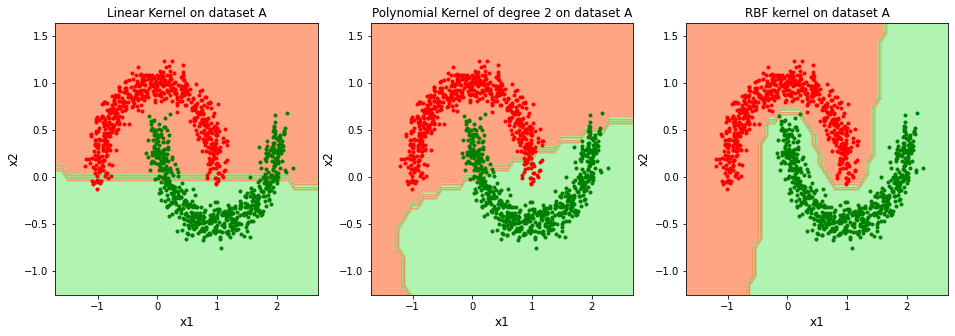

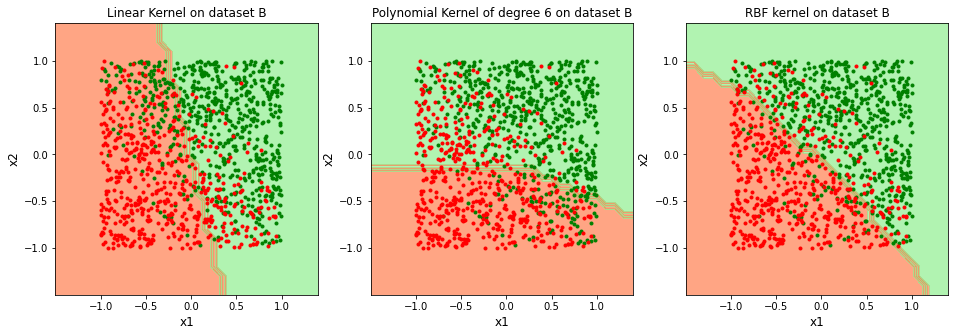

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6

def plot_logistic(X, Y, alpha, kernel, kernel_param=1):
    X1s = np.arange(start = X[:, 0].min() - 0.5, stop = X[:, 0].max() + 0.5, step = 0.1)
    X2s = np.arange(start = X[:, 1].min() - 0.5, stop = X[:, 1].max() + 0.5, step = 0.1)
    X1, X2 = np.meshgrid(X1s, X2s)
    X_plot = np.c_[X1.ravel(), X2.ravel()]
    Y_plot = test_pred(alpha, X, Y, X_plot, kernel, kernel_param).reshape(X1.shape)
    plt.contourf(X1, X2, Y_plot, alpha=0.7, colors=['coral', 'lightgreen'])
    plt.xlabel("x1", fontsize=12)
    plt.ylabel("x2", fontsize=12)
    plt.scatter(X[Y==1][:,0], X[Y==1][:,1], c='green', marker='.')
    plt.scatter(X[Y==-1][:,0], X[Y==-1][:,1], c='red', marker='.')

plt.figure(1,figsize=(16,5))
plt.subplot(131)
plot_logistic(X_train_A, Y_train_A, alpha_A1, 'linear')
plt.title("Linear Kernel on dataset A")

plt.subplot(132)
plot_logistic(X_train_A, Y_train_A, alpha_A2, 'poly', 2)
plt.title("Polynomial Kernel of degree 2 on dataset A")

plt.subplot(133)
plot_logistic(X_train_A, Y_train_A, alpha_A3, 'rbf', 10)
plt.title("RBF kernel on dataset A")

plt.figure(2,figsize=(16,5))
plt.subplot(131)
plot_logistic(X_train_B, Y_train_B, alpha_B1, 'linear')
plt.title("Linear Kernel on dataset B")

plt.subplot(132)
plot_logistic(X_train_B, Y_train_B, alpha_B2, 'poly', 6)
plt.title("Polynomial Kernel of degree 6 on dataset B")

plt.subplot(133)
plot_logistic(X_train_B, Y_train_B, alpha_B3, 'rbf', 10)
plt.title("RBF kernel on dataset B")

# 2. SVM

Write code for learning SVM below. Also write code for choosing best hyperparameters for each kernel type. You may use sklearn.svm for this purpose. (use a part of training set as validation set)

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For each classification data set report the best kernel and regularisation parameters for linear, RBF and Poly kernels. (Linear has no kernel parameter.) Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
from sklearn.svm import SVC

def model(X_train,y_train,kernel_param,reg_param,kernel):
  if kernel=='rbf':
    svm=SVC(C=reg_param,kernel=kernel,gamma=kernel_param)
    svm.fit(X_train,y_train)
    return svm
  elif kernel == 'poly':
    svm=SVC(C=reg_param,kernel=kernel,degree=kernel_param)
    svm.fit(X_train,y_train)
    return svm
  else:
    svm=SVC(C=reg_param,kernel=kernel)
    svm.fit(X_train,y_train)
    return svm
# Write SVM classifier using SKlearn
# write only functions here



In [ ]:
# CodeWrite cell

def rbf_param(X_train,y_train,X_val,y_val):
    rbf=[]
    for i in [0.01,0.1,1,10,100]:
      for j in [0.01,0.1,1,10,100]:
        svm=model(X_train,y_train,i,j,'rbf')
        a=svm.predict(X_val)
        rbf.append([i,j,np.count_nonzero(a!=y_val)/len(y_val)])
        #print('kernel: rbf '+' gamma: '+str(i)+' and C: '+str(j)+' val error is ',np.count_nonzero(a!=y_val)/len(y_val))
    a=np.array(rbf)
    a=a[a[:,1].argsort()]
    return([a[np.argmin(a[:,2]),0],a[np.argmin(a[:,2]),1]]) #returns [gamma,C]
    

def poly_param(X_train,y_train,X_val,y_val):
    poly=[]
    for i in [1,2,3,4,5,6,7,8,9,10]:
      for j in [0.1,1,10,100]:
        svm=model(X_train,y_train,i,j,'poly')
        a=svm.predict(X_val)
        poly.append([i,j,np.count_nonzero(a!=y_val)/len(y_val)])
        #print('kernel: poly '+' degree: '+str(i)+' and C: '+str(j)+' val error is ',np.count_nonzero(a!=y_val)/len(y_val))
    a=np.array(poly)
    a=a[a[:,1].argsort()]
    return([a[np.argmin(a[:,2]),0],a[np.argmin(a[:,2]),1]]) #return [degree,C]

def linear_param(X_train,y_train,X_val,y_val):
      linear=[]
      for j in [0.01,0.1,1,2,5,10,100]:
        svm=model(X_train,y_train,0,j,'linear')
        a=svm.predict(X_val)
        linear.append([j,np.count_nonzero(a!=y_val)/len(y_val)])
        #print('kernel: linear  C: '+str(j)+' val error is ',np.count_nonzero(a!=y_val)/len(y_val))
      a=np.array(linear)
      a=a[a[:,0].argsort()]
      return([a[np.argmin(a[:,1]),0]])


data_1=np.load('/content/drive/My Drive/Data/dataset_A.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

index = np.random.choice(a[0].shape[0],1500,replace=False)
X_train=a[0][index[:1200]]
X_val=a[0][index[1200:]]
y_train=a[1][index[:1200]]
y_val=a[1][index[1200:]]

rbf_param_A=rbf_param(X_train,y_train,X_val,y_val)
poly_param_A=poly_param(X_train,y_train,X_val,y_val)
linear_param_A=linear_param(X_train,y_train,X_val,y_val)

print('A data-rbf gamma,C: '+str(rbf_param_A)+ ' poly degree,C:'+str(poly_param_A)+' linear C:'+str(linear_param_A))

svm=model(a[0],a[1],rbf_param_A[0],rbf_param_A[1],'rbf')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_rbf_A=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data A - rbf -  train error,test error',error_rbf_A)


svm=model(a[0],a[1],poly_param_A[0],poly_param_A[1],'poly')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_poly_A=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data A - poly -  train error,test error',error_poly_A)

svm=model(a[0],a[1],0,linear_param_A[0],'linear')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_lin_A=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data A - lin -  train error,test error',error_lin_A)


data_1=np.load('/content/drive/My Drive/Data/dataset_B.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

index = np.random.choice(a[0].shape[0],1500,replace=False)
X_train=a[0][index[:1200]]
X_val=a[0][index[1200:]]
y_train=a[1][index[:1200]]
y_val=a[1][index[1200:]]

rbf_param_B=rbf_param(X_train,y_train,X_val,y_val)
poly_param_B=poly_param(X_train,y_train,X_val,y_val)
linear_param_B=linear_param(X_train,y_train,X_val,y_val)

print('B data-rbf gamma,C: '+str(rbf_param_B)+ ' poly degree,C:'+str(poly_param_B)+' linear C:'+str(linear_param_B))

svm=model(a[0],a[1],rbf_param_B[0],rbf_param_B[1],'rbf')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_rbf_B=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data B- rbf -  train error,test error',error_rbf_B)

svm=model(a[0],a[1],poly_param_B[0],poly_param_B[1],'poly')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_poly_B=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data B - poly -  train error,test error',error_poly_B)

svm=model(a[0],a[1],0,linear_param_B[0],'linear')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_lin_B=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data B - lin -  train error,test error',error_lin_B)



data_1=np.load('/content/drive/My Drive/Data/dataset_C.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

index = np.random.choice(a[0].shape[0],1500,replace=False)
X_train=a[0][index[:1200]]
X_val=a[0][index[1200:]]
y_train=a[1][index[:1200]]
y_val=a[1][index[1200:]]

rbf_param_C=rbf_param(X_train,y_train,X_val,y_val)
poly_param_C=poly_param(X_train,y_train,X_val,y_val)
linear_param_C=linear_param(X_train,y_train,X_val,y_val)
print('C data-rbf gamma,C: '+str(rbf_param_C)+ ' poly degree,C:'+str(poly_param_C)+' linear C:'+str(linear_param_C))

svm=model(a[0],a[1],rbf_param_C[0],rbf_param_C[1],'rbf')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_rbf_C=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data C - rbf -  train error,test error',error_rbf_C)

svm=model(a[0],a[1],poly_param_C[0],poly_param_C[1],'poly')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_poly_C=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data C - poly -  train error,test error',error_poly_C)
svm=model(a[0],a[1],0,linear_param_C[0],'linear')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_lin_C=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data C - lin -  train error,test error',error_lin_C)


data_1=np.load('/content/drive/My Drive/Data/dataset_D.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

index = np.random.choice(a[0].shape[0],400,replace=False)
X_train=a[0][index[:350]]
X_val=a[0][index[350:]]
y_train=a[1][index[:350]]
y_val=a[1][index[350:]]

rbf_param_D=rbf_param(X_train,y_train,X_val,y_val)
poly_param_D=poly_param(X_train,y_train,X_val,y_val)
linear_param_D=linear_param(X_train,y_train,X_val,y_val)
print('D data-rbf gamma,C: '+str(rbf_param_D)+ ' poly degree,C:'+str(poly_param_D)+' linear C:'+str(linear_param_D))

svm=model(a[0],a[1],rbf_param_D[0],rbf_param_D[1],'rbf')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_rbf_D=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data D - rbf -  train error,test error',error_rbf_D)

svm=model(a[0],a[1],poly_param_D[0],poly_param_D[1],'poly')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_poly_D=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data D - poly -  train error,test error',error_poly_D)

svm=model(a[0],a[1],0,linear_param_D[0],'linear')
y_pred_test=svm.predict(a[2])
y_pred_train=svm.predict(a[0])
error_lin_D=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('data D - lin -  train error,test error',error_lin_D)



# Write code here for doing validation (for kernel_param and regularisation_param)
# on a subset of the training set. 
# Also for generating the numbers that you report below.



A data-rbf gamma,C: [100.0, 0.1] poly degree,C:[7.0, 0.1] linear C:[1.0]
data A - rbf -  train error,test error [0.0, 0.002]
data A - poly -  train error,test error [0.06133333333333333, 0.084]
data A - lin -  train error,test error [0.12866666666666668, 0.134]
B data-rbf gamma,C: [0.01, 100.0] poly degree,C:[1.0, 1.0] linear C:[2.0]
data B- rbf -  train error,test error [0.174, 0.206]
data B - poly -  train error,test error [0.17733333333333334, 0.208]
data B - lin -  train error,test error [0.17666666666666667, 0.21]
C data-rbf gamma,C: [0.01, 10.0] poly degree,C:[8.0, 0.1] linear C:[1.0]
data C - rbf -  train error,test error [0.0, 0.15824915824915825]
data C - poly -  train error,test error [0.0, 0.030303030303030304]
data C - lin -  train error,test error [0.06466666666666666, 0.10437710437710437]
D data-rbf gamma,C: [0.01, 1.0] poly degree,C:[5.0, 100.0] linear C:[0.1]
data D - rbf -  train error,test error [0.0, 0.1301775147928994]
data D - poly -  train error,test error [0.09, 

TextWrite Cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error for all three kernel choices, for all 4 datasets (2 real world and 2 synthetic).  

| Data| Kernel | best kernel_param | best reg_param |train_error| test_error|
| --- | --- | --- | --- | ---| ---- |
|dataset_A|rbf| 10|0.01| 0.002666| 0.004 |
|dataset_A| poly| 7 |0.1| 0.061333| 0.084 |
|dataset_A|linear | N/A  |1|  0.12866 |0.134 |
|dataset_B|rbf| 0.1|100| 0.174| 0.204 |
|dataset_B| poly| 1|0.1| 0.17733| 0.198 |
|dataset_B|linear | N/A  |0.1|  0.17466 |0.196 |
|dataset_C|rbf| 0.01|10| 0.0| 0.1582 |
|dataset_C| poly| 3 |1| 0.00466| 0.040404 |
|dataset_C|linear | N/A  |1|  0.064666 |0.104377 |
|dataset_D|rbf| 0.01|10| 0.0| 0.1301 |
|dataset_D| poly| 2 |0.1| 0.12| 0.07100 |
|dataset_D|linear | N/A  |0.01|  0.045 |0.0828 |


Text(0.5, 1.0, 'dataset_B , kernel= linearC: 0.1')

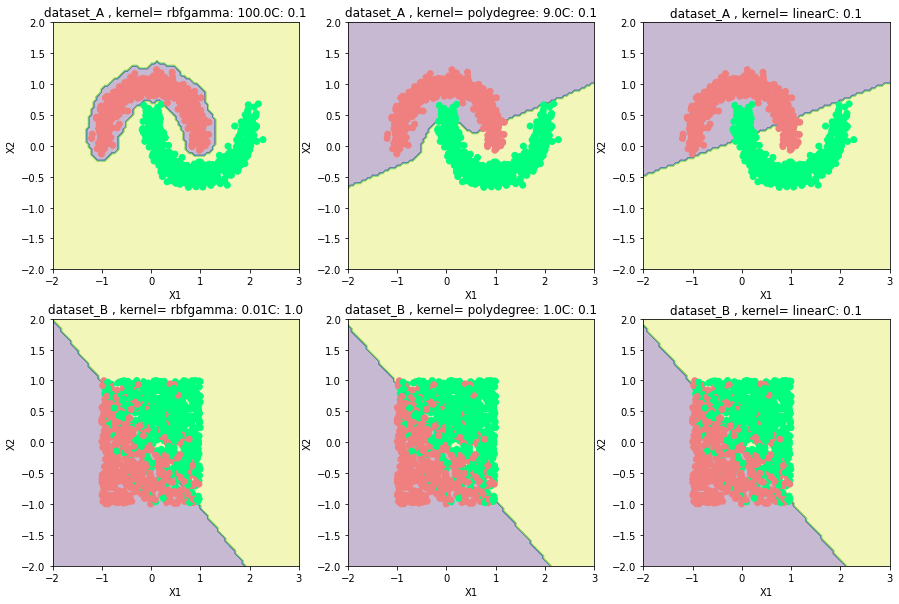

In [ ]:
# Codewrite cell: Generate plots of learned classifier for all three kernel types, on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 3 * 2 = 6
data_1=np.load('/content/drive/My Drive/Data/dataset_A.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

index = np.random.choice(a[0].shape[0],1500,replace=False)
X_train=a[0][index[:1200]]
X_val=a[0][index[1200:]]
y_train=a[1][index[:1200]]
y_val=a[1][index[1200:]]

import matplotlib
plt.figure(figsize=[15,10])
colors=['lightcoral','springgreen']
plt.subplot(2,3,1)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
svm=model(X_train,y_train,rbf_param(X_train,y_train,X_val,y_val)[0],rbf_param(X_train,y_train,X_val,y_val)[1],'rbf')
y_pred_ = svm.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('dataset_A , kernel= rbf'+'gamma: '+str(rbf_param(X_train,y_train,X_val,y_val)[0])+'C: '+str(rbf_param(X_train,y_train,X_val,y_val)[1]))


plt.subplot(2,3,2)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
svm=model(X_train,y_train,poly_param(X_train,y_train,X_val,y_val)[0],poly_param(X_train,y_train,X_val,y_val)[1],'poly')
y_pred_ = svm.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=matplotlib.colors.ListedColormap(colors))

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('dataset_A , kernel= poly'+'degree: '+str(poly_param(X_train,y_train,X_val,y_val)[0])+'C: '+str(poly_param(X_train,y_train,X_val,y_val)[1]))


plt.subplot(2,3,3)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
svm=model(X_train,y_train,0,linear_param(X_train,y_train,X_val,y_val)[0],'linear')
y_pred_ = svm.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=matplotlib.colors.ListedColormap(colors))

plt.xlabel('X1')
plt.ylabel('X2')
plt.title('dataset_A , kernel= linear'+'C: '+str(linear_param(X_train,y_train,X_val,y_val)[0]))



data_1=np.load('/content/drive/My Drive/Data/dataset_B.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

index = np.random.choice(a[0].shape[0],1500,replace=False)
X_train=a[0][index[:1200]]
X_val=a[0][index[1200:]]
y_train=a[1][index[:1200]]
y_val=a[1][index[1200:]]

import matplotlib
colors=['lightcoral','springgreen']
plt.subplot(2,3,4)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
svm=model(X_train,y_train,rbf_param(X_train,y_train,X_val,y_val)[0],rbf_param(X_train,y_train,X_val,y_val)[1],'rbf')
y_pred_ = svm.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('dataset_B , kernel= rbf'+'gamma: '+str(rbf_param(X_train,y_train,X_val,y_val)[0])+'C: '+str(rbf_param(X_train,y_train,X_val,y_val)[1]))


plt.subplot(2,3,5)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
svm=model(X_train,y_train,poly_param(X_train,y_train,X_val,y_val)[0],poly_param(X_train,y_train,X_val,y_val)[1],'poly')
y_pred_ = svm.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('dataset_B , kernel= poly'+'degree: '+str(poly_param(X_train,y_train,X_val,y_val)[0])+'C: '+str(poly_param(X_train,y_train,X_val,y_val)[1]))


plt.subplot(2,3,6)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
svm=model(X_train,y_train,0,linear_param(X_train,y_train,X_val,y_val)[0],'linear')
y_pred_ = svm.predict(X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(X_train[:,0],X_train[:,1],c=y_train,cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('dataset_B , kernel= linear'+'C: '+str(linear_param(X_train,y_train,X_val,y_val)[0]))



# 3. Decision Tree

Write code for learning decision tree below. Take as an argument a hyperparameter on what size node to stop splitting. Use a part of training set as validation set.

Write code for running in the cell after (You may be asked to demonstrate your code during the viva using this cell.)

In text cell after that report the following numbers you get by running appropriate code:

For all four data sets  report the best node size to stop splitting. Report the training and test zero-one error for those hyperparameters.

For datasets A and B, also illustrate the learned classifier. Do this in the last codeWrite cell for this question.

Important: Think about how you will represent a decision tree. (Possible soln: Store as a list of tuples containing node position, attribute to split, threshold, class to classifiy (if leaf node) )


In [ ]:
def generate_nodes(data):   ##for generating different possible nodes,
                             # in this case we are taking all datapoint as a possible node.
    node = {}
    for i in range(data.shape[1] - 1):        
        node[i] = data[:,i]
    return node

def data_divide(data, column, value):   #for dividing data into two at a specific value. 
    data_below = data[data[:, column] <= value]
    data_above = data[data[:, column] > value]
    return data_below, data_above

def accuracy(data_below, data_above): #for entropy of the split
    count_1 = np.unique(data_below[:, -1], return_counts=True)[1].max()
    count_2= np.unique(data_above[:, -1], return_counts=True)[1].max()
    accuracy = (count_1+count_2)/(len(data_below)+len(data_above))
    return accuracy

def best_node_entropy(data, node): #for best split based on entropy values
    ent={}                         #we calculate entropy for each split and find the minimum entropy split.   
    for column in node:
        for value in node[column]:
            data_below, data_above = data_divide(data, column,value)
            prob = np.unique(data_below[:, -1], return_counts=True)[1]/ np.unique(data_below[:, -1], return_counts=True)[1].sum()
            below_entropy = sum(prob * -np.log2(prob))
            prob = np.unique(data_above[:, -1], return_counts=True)[1] / np.unique(data_above[:, -1], return_counts=True)[1].sum()
            above_entropy = sum(prob * -np.log2(prob))
            entropy1=  ((len(data_below)/(len(data_below)+len(data_above)))* below_entropy + (len(data_above) / (len(data_below) + len(data_above))) *above_entropy)
            ent[entropy1]=[column,value]
    return sorted(ent.items())[0][1][0],sorted(ent.items())[0][1][1]


def best_node_accuracy(data, node):
    overall_acc = 0
    for column in node:
        for value in node[column]:
            data_below, data_above = data_divide(data, column,value)
            if (len(data_below)>10) and (len(data_above)>10):
              entropy1 = accuracy(data_below, data_above)
              if entropy1 >= overall_acc:
                overall_acc = entropy1
                col=column
                val=value
    return col,val

def train_decision_tree(X,Y, counter=0, num_nodes_stop=30,criterion='accuracy'): 
  data=np.zeros((len(X),X.shape[1]+1))  #concatenating both X and Y
  for i in range(len(X)):
    for j in range(X.shape[1]):
      data[i][j]=X[i,j]
    data[i][X.shape[1]]=Y[i]

  if criterion=='accuracy':  #for ACCURACY
    df=pd.DataFrame(data)    
    if (len(np.unique(data[:,-1])) == 1) or (len(data) < num_nodes_stop) or (counter == 1000):
        return np.unique(data[:,-1],return_counts=True)[0][np.unique(data[:,-1],return_counts=True)[1].argmax()]
    else:    
        counter += 1
        nodes = generate_nodes(data)   
        column, value = best_node_accuracy(data, nodes)
        data_below, data_above = data_divide(data, column, value)

        question = (column,value)
        tree = {question: []}

        yes_answer = train_decision_tree(np.delete(data_below,-1,axis=1),data_below[:,-1],counter,num_nodes_stop,criterion)
        no_answer = train_decision_tree(np.delete(data_above,-1,axis=1),data_above[:,-1], counter, num_nodes_stop,criterion)
  
        if yes_answer == no_answer:
            tree = yes_answer
        else:
            tree[question].append(yes_answer)
            tree[question].append(no_answer)
        
        return tree
  else:  ## criterion = ENTROPY
    if (len(np.unique(data[:,-1])) == 1) or (len(data) < num_nodes_stop) or (counter == 1000):
        return np.unique(data[:,-1],return_counts=True)[0][np.unique(data[:,-1],return_counts=True)[1].argmax()]
    else:    
        counter += 1
        nodes = generate_nodes(data)   
        column, value = best_node_entropy(data, nodes)
        data_below, data_above = data_divide(data, column, value)

        question = (column,value)
        tree = {question: []}

        yes = train_decision_tree(np.delete(data_below,-1,axis=1),data_below[:,-1], counter,num_nodes_stop,criterion)
        no = train_decision_tree(np.delete(data_above,-1,axis=1),data_above[:,-1], counter,num_nodes_stop, criterion)
  
        if yes == no:
            tree = yes
        else:
            tree[question].append(yes)
            tree[question].append(no)
        
        return tree


def eval_decision_tree(tree, test_X): #here test_X should be a dataframe of test samples
    y_pred=np.zeros(len(test_X))
    for i in range(len(test_X)):
        example=test_X[i]
        while True:
          question = list(tree.keys())[0]
          if example[int(str(question[0]))] <= float(question[1]):
            answer = tree[question][0]
          else:
            answer = tree[question][1]
          if type(answer)!= dict:
            y_pred[i]=answer
            break
          else:
            tree = answer
            continue
    return y_pred


In [ ]:
# CodeWrite cell
# Write code here for doing validation to find the best hyperparameters (i.e. num_nodes_stop)
# Also Generate the numbers that you report below. 
# Repeat with criterion set to entropy also.

def num_nodes_stop(data_train,data_val):
      linear=[]
      for j in [25,26,27,28,29,30,40,50,60,70,80,100]:
        tree=train_decision_tree(data_train[:,:-1],data_train[:,-1],criterion='accuracy',num_nodes_stop=j)
        a=eval_decision_tree(tree,data_val)
        linear.append([j,np.count_nonzero(a!=data_val[:,-1])/len(data_val[:,-1])])
        #print('nodes for accuracy'+str(j)+' val error is ',np.count_nonzero(a!=data_val[:,-1])/len(data_val[:,-1]))
      a=np.array(linear)
      a=a[a[:,0].argsort()]
      return([a[np.argmin(a[:,1]),0]])

def num_nodes_stop_entropy(data_train,data_val):
      linear=[]
      for j in [15,20,25,26,27,28,29,30,40,50,60,70,80,100]:
        tree=train_decision_tree(data_train[:,:-1],data_train[:,-1],criterion='entropy',num_nodes_stop=j)
        a=eval_decision_tree(tree,data_val)
        linear.append([j,np.count_nonzero(a!=data_val[:,-1])/len(data_val[:,-1])])
        #print('nodes for entropy'+str(j)+' val error is ',np.count_nonzero(a!=data_val[:,-1])/len(data_val[:,-1]))
      a=np.array(linear)
      a=a[a[:,0].argsort()]
      return([a[np.argmin(a[:,1]),0]])


data_1=np.load('/content/drive/My Drive/Data/dataset_A.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]

data_train=b[index[:1200]]
data_val=b[index[1200:]]

nodes_stop_accuracy=num_nodes_stop(data_train,data_val)[0]
nodes_stop_entropy=num_nodes_stop_entropy(data_train,data_val)[0]

tree_acc=train_decision_tree(a[0],a[1],criterion='accuracy',num_nodes_stop=nodes_stop_accuracy)
y_pred_test=eval_decision_tree(tree_acc,a[2])
y_pred_train=eval_decision_tree(tree_acc,a[0])

error_acc_A=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

tree_ent=train_decision_tree(a[0],a[1],criterion='entropy',num_nodes_stop=nodes_stop_entropy)
y_pred_test=eval_decision_tree(tree_ent,a[2])
y_pred_train=eval_decision_tree(tree_ent,a[0])


error_ent_A=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('Data A - num_nodes_stop for entropy: ' + str(nodes_stop_entropy)+' accuracy: '+str(nodes_stop_accuracy))
print('train error, test error for entropy ',error_ent_A)
print('train error, test error for accuracy ',error_acc_A)

data_1=np.load('/content/drive/My Drive/Data/dataset_B.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]

data_train=b[index[:1200]]
data_val=b[index[1200:]]

nodes_stop_accuracy=num_nodes_stop(data_train,data_val)[0]
nodes_stop_entropy=num_nodes_stop_entropy(data_train,data_val)[0]



tree_acc=train_decision_tree(a[0],a[1],criterion='accuracy',num_nodes_stop=nodes_stop_accuracy)
y_pred_test=eval_decision_tree(tree_acc,a[2])
y_pred_train=eval_decision_tree(tree_acc,a[0])

error_acc_B=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

tree_ent=train_decision_tree(a[0],a[1],criterion='entropy',num_nodes_stop=nodes_stop_entropy)
y_pred_test=eval_decision_tree(tree_ent,a[2])
y_pred_train=eval_decision_tree(tree_ent,a[0])


error_ent_B=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

print('Data B - num_nodes_stop for entropy: ' + str(nodes_stop_entropy)+' accuracy: '+str(nodes_stop_accuracy))
print('train error, test error for entropy ',error_ent_B)
print('train error, test error for accuracy ',error_acc_B)

data_1=np.load('/content/drive/My Drive/Data/dataset_C.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]

data_train=b[index[:1200]]
data_val=b[index[1200:]]

nodes_stop_accuracy=num_nodes_stop(data_train,data_val)[0]
nodes_stop_entropy=num_nodes_stop_entropy(data_train,data_val)[0]

tree_acc=train_decision_tree(a[0],a[1],criterion='accuracy',num_nodes_stop=nodes_stop_accuracy)
y_pred_test=eval_decision_tree(tree_acc,a[2])
y_pred_train=eval_decision_tree(tree_acc,a[0])

error_acc_C=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

tree_ent=train_decision_tree(a[0],a[1],criterion='entropy',num_nodes_stop=nodes_stop_entropy)
y_pred_test=eval_decision_tree(tree_ent,a[2])
y_pred_train=eval_decision_tree(tree_ent,a[0])


error_ent_C=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

print('Data C - num_nodes_stop for entropy: ' + str(nodes_stop_entropy)+' accuracy: '+str(nodes_stop_accuracy))
print('train error, test error for entropy ',error_ent_C)
print('train error, test error for accuracy ',error_acc_C)

data_1=np.load('/content/drive/My Drive/Data/dataset_D.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],400,replace=False)

b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]


data_train=b[index[:350]]
data_val=b[index[350:]]

nodes_stop_accuracy=num_nodes_stop(data_train,data_val)[0]
nodes_stop_entropy=num_nodes_stop_entropy(data_train,data_val)[0]


tree_acc=train_decision_tree(a[0],a[1],criterion='accuracy',num_nodes_stop=nodes_stop_accuracy)
y_pred_test=eval_decision_tree(tree_acc,a[2])
y_pred_train=eval_decision_tree(tree_acc,a[0])

error_acc_D=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

tree_ent=train_decision_tree(a[0],a[1],criterion='entropy',num_nodes_stop=nodes_stop_entropy)
y_pred_test=eval_decision_tree(tree_ent,a[2])
y_pred_train=eval_decision_tree(tree_ent,a[0])


error_ent_D=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

print('Data D - num_nodes_stop for entropy: ' + str(nodes_stop_entropy)+' accuracy: '+str(nodes_stop_accuracy))
print('train error, test error for entropy ',error_ent_D)
print('train error, test error for accuracy ',error_acc_D)



Data A - num_nodes_stop for entropy: 26.0 accuracy: 40.0
train error, test error for entropy  [0.0, 0.01]
train error, test error for accuracy  [0.076, 0.096]
Data B - num_nodes_stop for entropy: 50.0 accuracy: 40.0
train error, test error for entropy  [0.124, 0.214]
train error, test error for accuracy  [0.15733333333333333, 0.204]
Data C - num_nodes_stop for entropy: 15.0 accuracy: 25.0
train error, test error for entropy  [0.018, 0.10101010101010101]
train error, test error for accuracy  [0.07733333333333334, 0.1111111111111111]
Data D - num_nodes_stop for entropy: 20.0 accuracy: 25.0
train error, test error for entropy  [0.0275, 0.09467455621301775]
train error, test error for accuracy  [0.0525, 0.11834319526627218]


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

| Data| Criterion | best num_nodes_stop |train_error| test_error|
| --- | --- | --- | --- | ---| 
|dataset_A|entropy| 26|0| 0.01| 
|dataset_A| accuracy|40 |0.076| 0.096|
|dataset_B|entropy | 50 |0.124|  0.214 |
|dataset_B|accuracy| 40|0.157| 0.204|
|dataset_C| entropy| 15|0.018| 0.1010| 
|dataset_C|accuracy | 25  |0.0773|  0.111 |
|dataset_D|entropy| 20|0.0275| 0.0946|
|dataset_D| accuracy| 25 |0.0525| 0.118| 

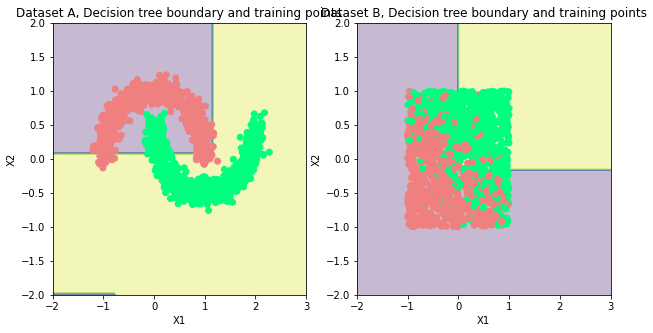

In [ ]:
## Codewrite cell: Generate plots of learned decision tree classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots only required for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 


import matplotlib
data_1=np.load('/content/drive/My Drive/Data/dataset_A.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]
plt.figure(figsize=[10,5])
colors=['lightcoral','springgreen']
plt.subplot(1,2,1)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
tree=train_decision_tree(a[0],a[1],criterion='accuracy',num_nodes_stop=40)
y_pred_ = eval_decision_tree(tree,X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset A, Decision tree boundary and training points')


data_1=np.load('/content/drive/My Drive/Data/dataset_B.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]
plt.subplot(1,2,2)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
tree=train_decision_tree(a[0],a[1],criterion='accuracy',num_nodes_stop=40)
y_pred_ = eval_decision_tree(tree,X_new).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset B, Decision tree boundary and training points');

# 4 Random Forest classifier

Write code for learning RandomForests below. Fix the following hyper parameters: (Fraction of data to learn tree=0.5, Fraction of number of features chosen in each node=0.5, num_nodes_stop=1).  Choose the number of trees to add in the forest by using a validation set. You may use a slightly modified version of the decision tree code you had written earlier.

Write code for running in the cell after the nest. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  report the best number of trees found. Report the training and test zero-one error for those hyperparameters.

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each kernel setting. Do this in the last codeWrite cell for this question.

In [ ]:
# CodeWrite cell
# Write Random Forest classifier. 
def generate_nodes_rf(data,b):  #b*(no. of features)
    node = {}
    a=[]
    for i in range(int((data.shape[1]-1)*b)):
          r=np.random.randint(0,data.shape[1]-1)
          if r not in a: a.append(r)
    for i in a:        
        node[i] = data[:,i]
    return node

def train_decision_tree_rf(X,Y, counter=0, num_nodes_stop=40, max_depth=1000,criterion='accuracy',a=0.5,b=0.5): 
  data=np.zeros((len(X),X.shape[1]+1))
  for i in range(len(X)):
    for j in range(X.shape[1]):
      data[i][j]=X[i,j]
    data[i][X.shape[1]]=Y[i]

  if criterion=='accuracy':
    df=pd.DataFrame(data)    
    if (len(np.unique(data[:,-1])) == 1) or (len(data) < num_nodes_stop) or (counter == max_depth):
        return np.unique(data[:,-1],return_counts=True)[0][np.unique(data[:,-1],return_counts=True)[1].argmax()]
    else:    
        counter += 1
        nodes = generate_nodes_rf(data,b)   
        column, value = best_node_accuracy(data, nodes)
        data_below, data_above = data_divide(data, column, value)

        question = (column,value)
        sub_tree = {question: []}

        yes_answer = train_decision_tree_rf(data_below[:,:-1], data_below[:,-1],counter, num_nodes_stop,max_depth,criterion,a=1,b=0.5)
        no_answer = train_decision_tree_rf(data_above[:,:-1],data_above[:,-1], counter, num_nodes_stop,max_depth,criterion,a=1,b=0.5)
  
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree
  else:
    if (len(np.unique(data[:,-1])) == 1) or (len(data) < num_nodes_stop) or (counter == max_depth):
        return np.unique(data[:,-1],return_counts=True)[0][np.unique(data[:,-1],return_counts=True)[1].argmax()]
    else:    
        counter += 1
        nodes = generate_nodes_rf(data,b)   
        column, value = best_node_entropy(data, nodes)
        data_below, data_above = data_divide(data, column, value)

        question = (column,value)
        sub_tree = {question: []}

        yes_answer = train_decision_tree_rf(data_below[:,:-1], data_below[:,-1],counter, num_nodes_stop, max_depth,criterion,a=1,b=0.5)
        no_answer = train_decision_tree_rf(data_above[:,:-1], data_above[:,-1],counter, num_nodes_stop,max_depth,criterion,a=1,b=0.5)
  
        if yes_answer == no_answer:
            sub_tree = yes_answer
        else:
            sub_tree[question].append(yes_answer)
            sub_tree[question].append(no_answer)
        
        return sub_tree


def train_random_forest(X, Y, num_trees=10, num_nodes_stop=40, 
                        criterion='accuracy', a=0.5, b=0.5):
  tree=[]
  for i in range(int(num_trees)):
    index = np.random.choice(X.shape[0],int(a*len(X)),replace=False)
    X_=X[index]
    Y_=Y[index]
    tree.append(train_decision_tree_rf(X_,Y_,b=0.5,num_nodes_stop=40))
  return tree

def classify(example, tree):
    question = list(tree.keys())[0]
    if example[int(str(question[0]))] <= float(question[1]):
        answer = tree[question][0]
    else:
        answer = tree[question][1]
    if type(answer)!= dict:
        return answer
    else:
        tree = answer
        return classify(example,tree)


def eval_random_forest(random_forest, test_X):
      y_pred=np.zeros(len(test_X))
      for i in range(len(test_X)):
        y=[]
        for j in range(len(random_forest)):
          y.append(classify(test_X.iloc[i],random_forest[j]))
        y_pred[i]=pd.DataFrame(y).mode()[0][0]
      return y_pred



In [ ]:
# CodeWrite cell
# Write code for choosing the best hyperparameters (num_trees, num_nodes_stop)
# Write code here for generating the numbers that you report below.
# Repeat above for criterion set to entropy also.
def num_trees(data_train,data_val):
      linear=[]
      for j in [10,20,30,40,50,60]:
        tree=train_random_forest(data_train[:,:-1],data_train[:,-1],criterion='accuracy',num_trees=j)
        a=eval_random_forest(tree,pd.DataFrame(data_val))
        linear.append([j,np.count_nonzero(a!=data_val[:,-1])/len(data_val[:,-1])])
        #print('trees for accuracy'+str(j)+' val error is ',np.count_nonzero(a!=data_val[:,-1])/len(data_val[:,-1]))
      a=np.array(linear)
      a=a[a[:,0].argsort()]
      return ([a[np.argmin(a[:,1]),0]])

def num_trees_entropy(data_train,data_val):
      linear=[]
      for j in [10,20,30,40,50,60,70]:
        tree=train_random_forest(data_train[:,:-1],data_train[:,-1],criterion='entropy',num_trees=j)
        a=eval_random_forest(tree,pd.DataFrame(data_val))
        linear.append([j,np.count_nonzero(a!=data_val[:,-1])/len(data_val[:,-1])])
        #print('trees for accuracy'+str(j)+' val error is ',np.count_nonzero(a!=data_val[:,-1])/len(data_val[:,-1]))
      a=np.array(linear)
      a=a[a[:,0].argsort()]
      return ([a[np.argmin(a[:,1]),0]])

data_1=np.load('/content/drive/My Drive/Data/dataset_A.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]

data_train=b[index[:1200]]
data_val=b[index[1200:]]

num_trees_acc=num_trees(data_train,data_val)[0]
num_trees_ent=num_trees_entropy(data_train,data_val)[0]

rf_acc=train_random_forest(a[0],a[1],criterion='accuracy',num_trees=num_trees_acc)
y_pred_test=eval_random_forest(rf_acc,pd.DataFrame(a[2]))
y_pred_train=eval_random_forest(rf_acc,pd.DataFrame(a[0]))

error_acc_A=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

rf_ent=train_random_forest(a[0],a[1],criterion='entropy',num_trees=num_trees_ent)
y_pred_test=eval_random_forest(rf_ent,pd.DataFrame(a[2]))
y_pred_train=eval_random_forest(rf_ent,pd.DataFrame(a[0]))

error_ent_A=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

print('Data A - No. of optimum trees in accuracy' + str(num_trees_acc) + ' in entropy:' + str(num_trees_ent))
print('train error and test error for entropy ',error_ent_A )
print('train error and test error for accuracy ',error_acc_A )

data_1=np.load('/content/drive/My Drive/Data/dataset_B.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]

data_train=b[index[:1200]]
data_val=b[index[1200:]]

num_trees_acc=num_trees(data_train,data_val)[0]
num_trees_ent=num_trees_entropy(data_train,data_val)[0]

rf_acc=train_random_forest(a[0],a[1],criterion='accuracy',num_trees=num_trees_acc)
y_pred_test=eval_random_forest(rf_acc,pd.DataFrame(a[2]))
y_pred_train=eval_random_forest(rf_acc,pd.DataFrame(a[0]))

error_acc_B=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

rf_ent=train_random_forest(a[0],a[1],criterion='entropy',num_trees=num_trees_ent)
y_pred_test=eval_random_forest(rf_ent,pd.DataFrame(a[2]))
y_pred_train=eval_random_forest(rf_ent,pd.DataFrame(a[0]))

error_ent_B=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]
print('Data B - No. of optimum trees in accuracy' + str(num_trees_acc) + ' in entropy:' + str(num_trees_ent))
print('train error and test error for entropy ',error_ent_B )
print('train error and test error for accuracy ',error_acc_B )

data_1=np.load('/content/drive/My Drive/Data/dataset_C.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]

data_train=b[index[:1200]]
data_val=b[index[1200:]]

num_trees_acc=num_trees(data_train,data_val)[0]
num_trees_ent=num_trees_entropy(data_train,data_val)[0]

rf_acc=train_random_forest(a[0],a[1],criterion='accuracy',num_trees=num_trees_acc)
y_pred_test=eval_random_forest(rf_acc,pd.DataFrame(a[2]))
y_pred_train=eval_random_forest(rf_acc,pd.DataFrame(a[0]))

error_acc_C=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

rf_ent=train_random_forest(a[0],a[1],criterion='entropy',num_trees=num_trees_ent)
y_pred_test=eval_random_forest(rf_ent,pd.DataFrame(a[2]))
y_pred_train=eval_random_forest(rf_ent,pd.DataFrame(a[0]))

error_ent_C=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

print('Data C - No. of optimum trees in accuracy' + str(num_trees_acc) + ' in entropy:' + str(num_trees_ent))
print('train error and test error for entropy ',error_ent_C )
print('train error and test error for accuracy ',error_acc_C )

data_1=np.load('/content/drive/My Drive/Data/dataset_D.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],400,replace=False)

b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]

data_train=b[index[:350]]
data_val=b[index[350:]]

num_trees_acc=num_trees(data_train,data_val)[0]
num_trees_ent=num_trees_entropy(data_train,data_val)[0]

rf_acc=train_random_forest(a[0],a[1],criterion='accuracy',num_trees=num_trees_acc)
y_pred_test=eval_random_forest(rf_acc,pd.DataFrame(a[2]))
y_pred_train=eval_random_forest(rf_acc,pd.DataFrame(a[0]))

error_acc_D=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

rf_ent=train_random_forest(a[0],a[1],criterion='entropy',num_trees=num_trees_ent)
y_pred_test=eval_random_forest(rf_ent,pd.DataFrame(a[2]))
y_pred_train=eval_random_forest(rf_ent,pd.DataFrame(a[0]))

error_ent_D=[np.count_nonzero(y_pred_train!=a[1])/len(a[1]),np.count_nonzero(y_pred_test!=a[3])/len(a[3])]

print('Data D - No. of optimum trees in accuracy' + str(num_trees_acc) + ' in entropy:' + str(num_trees_ent))
print('train error and test error for entropy ',error_ent_D )
print('train error and test error for accuracy ',error_acc_D )

Data A - No. of optimum trees in accuracy60.0 in entropy:40.0
train error and test error for entropy  [0.010666666666666666, 0.018]
train error and test error for accuracy  [0.008666666666666666, 0.014]
Data B - No. of optimum trees in accuracy10.0 in entropy:30.0
train error and test error for entropy  [0.168, 0.202]
train error and test error for accuracy  [0.15933333333333333, 0.214]
Data C - No. of optimum trees in accuracy60.0 in entropy:40.0
train error and test error for entropy  [0.054, 0.08417508417508418]
train error and test error for accuracy  [0.04666666666666667, 0.08754208754208755]
Data D - No. of optimum trees in accuracy10.0 in entropy:50.0
train error and test error for entropy  [0.045, 0.0650887573964497]
train error and test error for accuracy  [0.0675, 0.08875739644970414]


TextWrite cell: Give your observations and the list of hyperparameter choices and train zero-one error  and test zero-one error, for all 4 datasets (2 real world and 2 synthetic).  

| Data| Criterion | best num_trees |train_error| test_error|
| --- | --- | --- | --- | ---| 
|dataset_A|entropy| 40|0.0106| 0.018| 
|dataset_A| accuracy|60 |0.0086| 0.014|
|dataset_B|entropy | 30 |0.168|  0.202 |
|dataset_B|accuracy| 10|0.1593| 0.214|
|dataset_C| entropy| 40|0.054| 0.084| 
|dataset_C|accuracy | 60  |0.046|  0.0875 |
|dataset_D|entropy| 50|0.045| 0.065|
|dataset_D| accuracy| 10 |0.0675| 0.0088| 


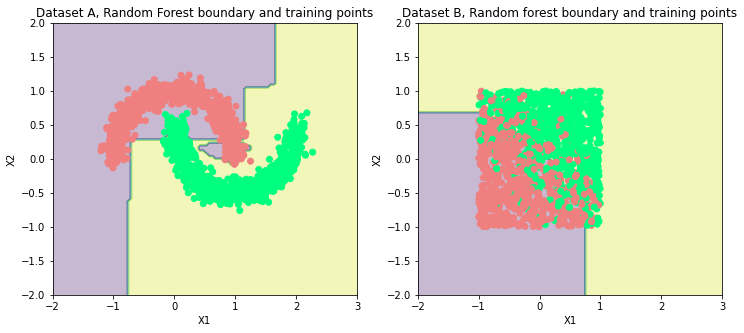

In [ ]:
## Codewrite cell: Generate plots of learned Random Forest classifier on dataset_A and datasset_B.
# Plots should give both the learned classifier and the train data. 
# Plots required only for the accuracy criterion.
# Similar to  Bishop Figure 4.5 (with just two classes here.)
# Total number of plots = 2 

import matplotlib
data_1=np.load('/content/drive/My Drive/Data/dataset_A.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]
plt.figure(figsize=[12,5])
colors=['lightcoral','springgreen']
plt.subplot(1,2,1)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
tree= train_random_forest(a[0],a[1],criterion='accuracy',num_trees=60)
y_pred_= eval_random_forest(tree,pd.DataFrame(X_new)).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset A, Random Forest boundary and training points');


data_1=np.load('/content/drive/My Drive/Data/dataset_B.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]
plt.subplot(1,2,2)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
tree=train_random_forest(a[0],a[1],criterion='accuracy',num_trees=10)
y_pred_ = eval_random_forest(tree,pd.DataFrame(X_new)).reshape(x1.shape)
plt.contourf(x1, x2, y_pred_, alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset B, Random forest boundary and training points');

# 5 AdaBoost

Write code for learning using AdaBoost below. Use 3 different weak learners below. (You may reuse code written above)

1. 1 node decision tree 
2. Decision tree of fixed depth = 3 (Root, child, grand child)
3. Decision tree of fixed depth = 7 (Root, child, grand child)

Run for 50 iterations. You may use the accuracy split criterion for all the three weak learners.

Write code for running in the next cell. (You may be asked to demonstrate your code during the viva using this cell.) 

In text cell after that report the following numbers you get by running appropriate code:

For all 4 data sets (A,B,C,D)  plot the train and test accuracy vs epochs. A total of 12 plots is expected. 4 datasets * 3 weak learners. Each plot should contain two curves, train and test error.  

For the synthetic classification datasets (datasets A and B) in 2-dimensions, also illustrate the learned classifier for each weak learner setting. A total of 6 contourf style plots are expected here. Do this in the last codeWrite cell for this question.

Summarise your observations in the last textwrite cell.

In [2]:
def generate_nodes_ada(data):   ##for generating different possible nodes,
                             # in this case we are taking 50 points as possible node.
    node = {}
    for i in range(data.shape[1] - 1):        
        node[i] = np.linspace(min(data[:,i]),max(data[:,i]),50)
    return node

def data_divide(data, w, column, value):   #for dividing data into two at a specific value. 
    data_below, w_below = data[data[:, column] <= value], w[data[:, column] <= value]
    data_above, w_above = data[data[:, column] > value], w[data[:, column] > value]
    return data_below, data_above, w_below, w_above
  
def accuracy_for_tree(data_below, data_above, w_below, w_above): #for accuracy of the split
    below_max = np.unique(data_below[:, -1], return_counts=True)[1].max()
    above_max = np.unique(data_above[:, -1], return_counts=True)[1].max()
    if(above_max >= below_max):
      above_sign = np.unique(data_above, return_counts=True)[0][np.argmax(np.unique(data_above, return_counts=True)[1])]
      below_sign = np.unique(data_above, return_counts=True)[0][np.argmin(np.unique(data_above, return_counts=True)[1])]
    else:
      above_sign = np.unique(data_below, return_counts=True)[0][np.argmin(np.unique(data_below, return_counts=True)[1])]
      below_sign = np.unique(data_below, return_counts=True)[0][np.argmax(np.unique(data_below, return_counts=True)[1])]
    value = 0
    for i in range(len(data_above)):
      if(data_above[i,-1] == above_sign):
        value += w_above[i]
    for i in range(len(data_below)):
      if(data_below[i,-1] == below_sign):
        value += w_below[i]
    
    accuracy = value / (np.sum(w_above) + np.sum(w_below))
    return(accuracy)

    """
    count_1 = np.unique(data_below[:, -1], return_counts=True)[1].max()
    count_2 = np.unique(data_above[:, -1], return_counts=True)[1].max()
    accuracy = (count_1+count_2)/(len(data_below)+len(data_above))
    return accuracy
    """

def best_node_accuracy(data, node, w):
    overall_acc = 0
    for column in node:
        for value in node[column]:
            data_below, data_above, w_below, w_above = data_divide(data, w, column, value)
            if (len(data_below)>10) and (len(data_above)>10):
              entropy1 = accuracy_for_tree(data_below, data_above, w_below, w_above)
              if entropy1 >= overall_acc:
                overall_acc = entropy1
                col = column
                val = value
    return col,val

def train_decision_tree_ada(X, Y, w, counter=0, num_nodes_stop=30,criterion='accuracy', max_depth=7): 
  data=np.zeros((len(X),X.shape[1]+1))  #concatenating both X and Y
  for i in range(len(X)):
    for j in range(X.shape[1]):
      data[i][j]=X[i,j]
    data[i][X.shape[1]]=Y[i]

  if criterion=='accuracy':  #for ACCURACY
    df = pd.DataFrame(data)    
    if (len(np.unique(data[:,-1])) == 1) or (len(data) < num_nodes_stop) or (counter == max_depth):
        return np.unique(data[:,-1],return_counts=True)[0][np.unique(data[:,-1],return_counts=True)[1].argmax()]
    else:    
        counter += 1
        nodes = generate_nodes_ada(data)   
        column, value = best_node_accuracy(data, nodes, w)
        data_below, data_above, w_below, w_above = data_divide(data, w, column, value)

        question = (column,value)
        tree = {question: []}

        yes_answer = train_decision_tree_ada(np.delete(data_below,-1,axis=1),data_below[:,-1], w_below,counter=0,num_nodes_stop=(10-max_depth)*30,criterion='accuracy',max_depth=max_depth)
        no_answer = train_decision_tree_ada(np.delete(data_above,-1,axis=1),data_above[:,-1], w_above,counter=0, num_nodes_stop=(10-max_depth)*30,criterion='accuracy',max_depth=max_depth)
  
        if yes_answer == no_answer:
            tree = yes_answer
        else:
            tree[question].append(yes_answer)
            tree[question].append(no_answer)
        
        return tree

def classify(example, tree):
    question = list(tree.keys())[0]
    if example[int(str(question[0]))] <= float(question[1]):
        answer = tree[question][0]
    else:
        answer = tree[question][1]
    if not isinstance(answer, dict):
        return answer
    else:
        residual_tree = answer
        return classify(example, residual_tree)

def eval_decision_tree(tree, test_X):
    y_pred=np.zeros(len(test_X))
    for i in range(len(test_X)):
        y_pred[i]=classify(test_X[i,:],tree)
    return y_pred

# Codewrite cell
# Write code to run here (no plotting)
def compute_gamma(Y_pred, Y, w):
  val = 0
  for i in range(w.shape[0]):
    val += w[i]*(abs(Y_pred[i]-Y[i])/2)
  gamma = 0.5 - val/(np.sum(w))
  return(gamma)

def compute_accuracy(true, pred):
    n = true.shape[0]
    correct = 0
    for i in range(n):
        if(true[i]==pred[i]):
            correct += 1
    return(correct/n)

def train_adaboost(X, Y, tree_depth, iters=20):
  n, d = X.shape[0], X.shape[1]
  w = np.array([1]*n)
  beta = [0]*iters
  classifier = [0]*iters
  train_accuracy=[]
  for t in range(iters):
    tree = train_decision_tree_ada(X, Y, w, max_depth=tree_depth)
    #print(tree)
    if tree==-1.0 or tree==1.0:
      Y_pred=np.ones(len(X),)*tree
    else:
      Y_pred=eval_decision_tree(tree,X)
    #print(f"iteration = {t}, train accuracy = {compute_accuracy(Y_pred, Y)}")
    gamma = compute_gamma(Y_pred, Y, w)
    train_accuracy.append(compute_accuracy(Y_pred, Y))
    #print(f"gamma = {gamma}")
    beta[t] = (0.5 + gamma)/(0.5 - gamma)
    #print(f"beta = {beta[t]}")
    classifier[t] = tree
    #print(sum(w))
    for i in range(n):
      l = abs(Y_pred[i] - Y[i])/2
      w[i] = (w[i])*((beta[t])**l)
  return(beta, classifier)

def eval_adaboost(beta, classifier, test_X, test_Y, iters=10):
  test_accuracy = [0]*iters
  Y_final = [0]*len(test_X)
  for t in range(iters):
    Y = []
    for x in test_X:
      val = 0
      h_x = eval_decision_tree(classifier[t], np.array([x]))
      val = np.log(beta[t])*h_x
      Y.append(val)
    for i in range(len(test_X)):
      Y_final[i] += Y[i]
    test_accuracy[t] = compute_accuracy(test_Y, np.sign(Y_final))

  return(np.sign(Y_final), test_accuracy)


1
2
3
4
5
6
7
8
9
10
11
12


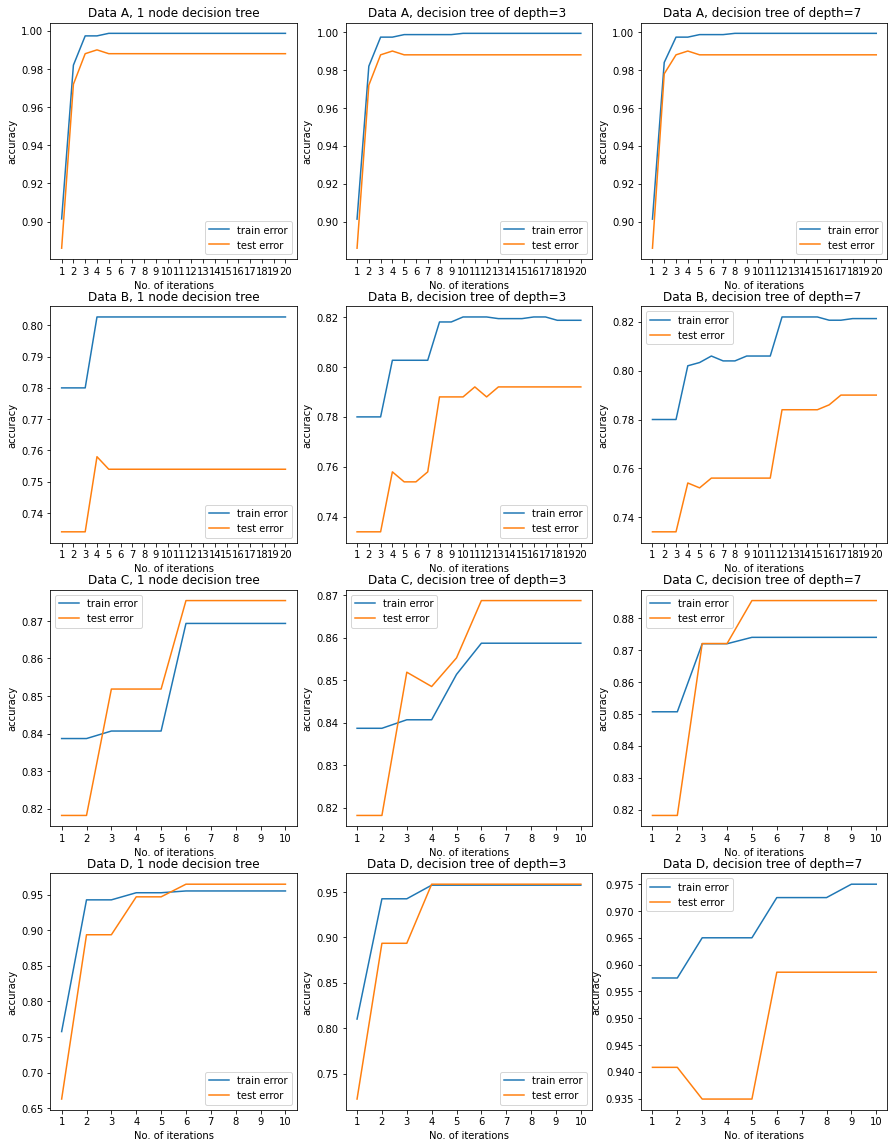

In [3]:
data_1=np.load('/content/drive/My Drive/Data/dataset_A.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
ans=train_adaboost(a[0],a[1], tree_depth=2, iters=20)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=20)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=20)


plt.figure(figsize=[15,20])
plt.subplot(4,3,1)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data A, 1 node decision tree')
plt.legend(('train error','test error'))


ans=train_adaboost(a[0],a[1], tree_depth=3, iters=20)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=20)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=20)


plt.subplot(4,3,2)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data A, decision tree of depth=3 ')
plt.legend(('train error','test error'))


ans=train_adaboost(a[0],a[1], tree_depth=7, iters=20)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=20)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=20)

plt.subplot(4,3,3)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data A, decision tree of depth=7 ')
plt.legend(('train error','test error'))

data_1=np.load('/content/drive/My Drive/Data/dataset_B.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

ans=train_adaboost(a[0],a[1], tree_depth=2, iters=20)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=20)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=20)

plt.subplot(4,3,4)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data B, 1 node decision tree')
plt.legend(('train error','test error'))

ans=train_adaboost(a[0],a[1], tree_depth=3, iters=20)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=20)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=20)

plt.subplot(4,3,5)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data B, decision tree of depth=3 ')
plt.legend(('train error','test error'))


ans=train_adaboost(a[0],a[1], tree_depth=7, iters=20)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=20)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=20)

plt.subplot(4,3,6)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,20),[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data B, decision tree of depth=7 ')
plt.legend(('train error','test error'))

data_1=np.load('/content/drive/My Drive/Data/dataset_C.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
ans=train_adaboost(a[0],a[1], tree_depth=2, iters=10)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=10)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=10)

plt.subplot(4,3,7)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,10),[1,2,3,4,5,6,7,8,9,10]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data C, 1 node decision tree')
plt.legend(('train error','test error'))


ans=train_adaboost(a[0],a[1], tree_depth=3, iters=10)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=10)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=10)

plt.subplot(4,3,8)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,10),[1,2,3,4,5,6,7,8,9,10]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data C, decision tree of depth=3 ')
plt.legend(('train error','test error'))


ans=train_adaboost(a[0],a[1], tree_depth=7, iters=10)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=10)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=10)

plt.subplot(4,3,9)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,10),[1,2,3,4,5,6,7,8,9,10]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data C, decision tree of depth=7 ')
plt.legend(('train error','test error'))


data_1=np.load('/content/drive/My Drive/Data/dataset_D.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])

ans=train_adaboost(a[0],a[1], tree_depth=2, iters=10)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=10)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=10)

plt.subplot(4,3,10)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,10),[1,2,3,4,5,6,7,8,9,10]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data D, 1 node decision tree')
plt.legend(('train error','test error'))


ans=train_adaboost(a[0],a[1], tree_depth=3, iters=10)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=10)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=10)

plt.subplot(4,3,11)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,10),[1,2,3,4,5,6,7,8,9,10]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data D, decision tree of depth=3 ')
plt.legend(('train error','test error'))

ans=train_adaboost(a[0],a[1], tree_depth=7, iters=10)
Y_pred_test, test_error = eval_adaboost(ans[0], ans[1], a[2], a[3], iters=10)
Y_pred_test, train_error= eval_adaboost(ans[0], ans[1], a[0], a[1], iters=10)

plt.subplot(4,3,12)
plt.plot(range(len(train_error)),train_error)
plt.plot(range(len(test_error)),test_error)
plt.xticks(range(0,10),[1,2,3,4,5,6,7,8,9,10]);
plt.ylabel('accuracy')
plt.xlabel('No. of iterations')
plt.title('Data D, decision tree of depth=7 ')
plt.legend(('train error','test error'))


1


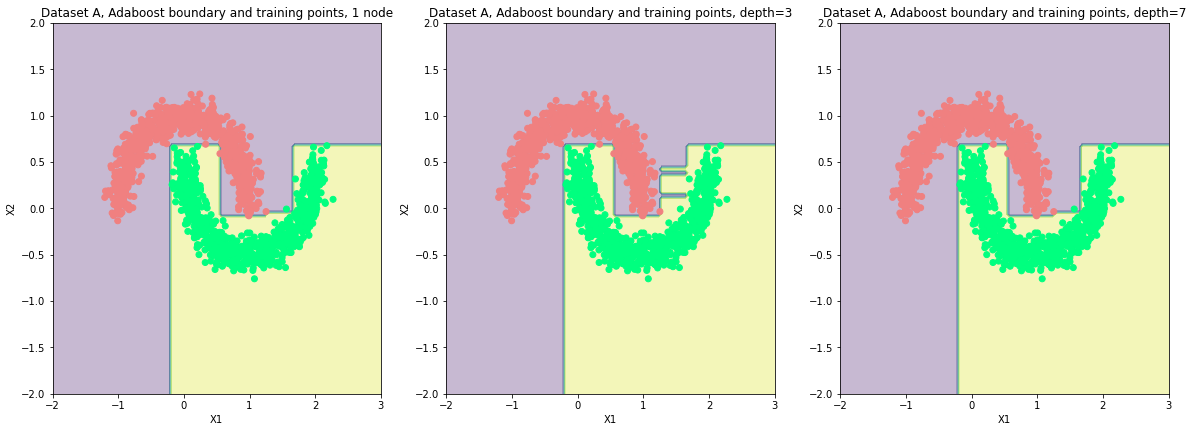

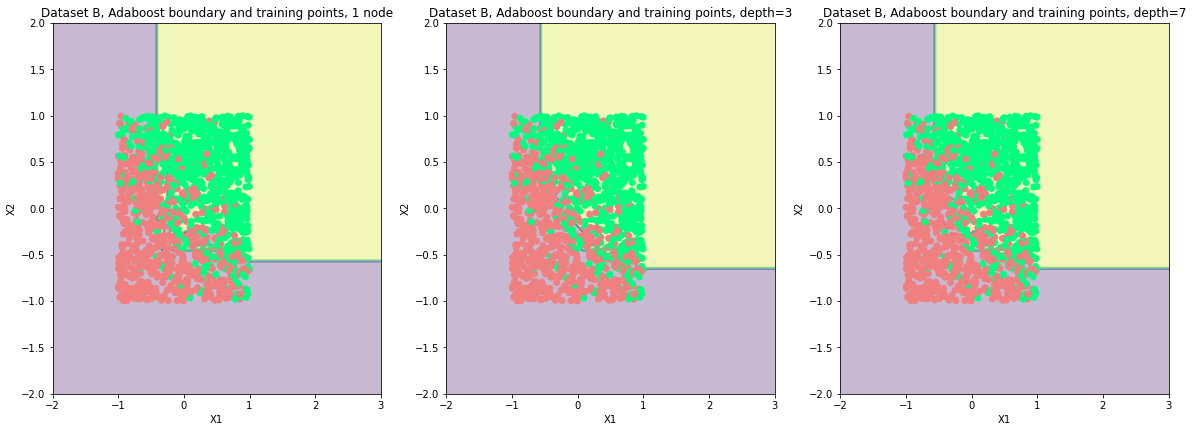

In [4]:
# Codewrite cell 
# Plots for illustrating the classifier here
# Codewrite cell 
# Plots for illustrating the classifier here
import matplotlib
data_1=np.load('/content/drive/My Drive/Data/dataset_A.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]
plt.figure(figsize=[20,15])
colors=['lightcoral','springgreen']
plt.subplot(2,3,1)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]

ans=train_adaboost(a[0],a[1], tree_depth=2, iters=20)
y_pred_, test_error = eval_adaboost(ans[0], ans[1],X_new, a[3], iters=20)

plt.contourf(x1, x2,np.array(y_pred_).reshape(x1.shape), alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset A, Adaboost boundary and training points, 1 node');

colors=['lightcoral','springgreen']
plt.subplot(2,3,2)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
ans=train_adaboost(a[0],a[1], tree_depth=3, iters=20)
y_pred_, test_error = eval_adaboost(ans[0], ans[1],X_new, a[3], iters=20)

plt.contourf(x1, x2,np.array(y_pred_).reshape(x1.shape), alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset A, Adaboost boundary and training points, depth=3');

colors=['lightcoral','springgreen']
plt.subplot(2,3,3)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
ans=train_adaboost(a[0],a[1], tree_depth=7, iters=20)
y_pred_, test_error = eval_adaboost(ans[0], ans[1],X_new, a[3], iters=20)

plt.contourf(x1, x2,np.array(y_pred_).reshape(x1.shape), alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset A, Adaboost boundary and training points, depth=7');


data_1=np.load('/content/drive/My Drive/Data/dataset_B.npz')
lst = data_1.files
a=[]
for item in lst:
    a.append(data_1[item])
index = np.random.choice(a[0].shape[0],1500,replace=False)
b=np.zeros((len(a[0]),a[0].shape[1]+1))
for i in range(len(a[0])):
  for j in range(a[0].shape[1]):
    b[i][j]=a[0][i,j]
  b[i][a[0].shape[1]]=a[1][i]
plt.figure(figsize=[20,15])
colors=['lightcoral','springgreen']
plt.subplot(2,3,4)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]
ans=train_adaboost(a[0],a[1], tree_depth=2, iters=20)
y_pred_, test_error = eval_adaboost(ans[0], ans[1],X_new, a[3], iters=20)

plt.contourf(x1, x2,np.array(y_pred_).reshape(x1.shape), alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset B, Adaboost boundary and training points, 1 node');

colors=['lightcoral','springgreen']
plt.subplot(2,3,5)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]

ans=train_adaboost(a[0],a[1], tree_depth=3, iters=20)
y_pred_, test_error = eval_adaboost(ans[0], ans[1],X_new, a[3], iters=20)

plt.contourf(x1, x2,np.array(y_pred_).reshape(x1.shape), alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset B, Adaboost boundary and training points, depth=3');

colors=['lightcoral','springgreen']
plt.subplot(2,3,6)
x1 = np.linspace(-2,3,100)
x2 = np.linspace(-2,2,100)
x1, x2 = np.meshgrid(x1, x2)
X_new = np.c_[x1.ravel(), x2.ravel()]

ans=train_adaboost(a[0],a[1], tree_depth=7, iters=20)
y_pred_, test_error = eval_adaboost(ans[0], ans[1],X_new, a[3], iters=20)

plt.contourf(x1, x2,np.array(y_pred_).reshape(x1.shape), alpha=0.3)
plt.scatter(b[:,0],b[:,1],c=b[:,2],cmap=matplotlib.colors.ListedColormap(colors))
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Dataset B, Adaboost boundary and training points, depth=7');

(Because of time constraints C and D datasets are run for only 10 iterations:)

##Observations:

1) The accuracy of the classifier increases with iteration and reaches a maximum.

2) One node weak learner has the least overall accuracy followed by depth 3 and the depth 7 weak learner has the highest overall accuracy. 

